In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [189]:
#黄金分割法
rate = 0.618034
pointset = []
x = 0
y = 0
xxxx = 0.5
l_m = 0.8
def f(x):
    return 1.0 * (pow(x, 4) - 4 * pow(x, 3) - 6 * pow(x, 2) - 16 * x + 4)

def backtrace(f, a0, b0, accuracy):

    a = a0
    b = b0
    x2 = a + rate*(b - a)
    x1 = a + b - x2
    f2 = f(x2)
    f1 = f(x1)
    #print( x1, x2, '\n')
    arr = search(f, a, b, f1, f2, x1, x2, accuracy)
    return arr[1]
    #printFunc(f, a, b, arr[0], arr[1])

def search(f, a, b, f1, f2, x1, x2, accuracy):
    if f1 <= f2:
        if x2 - a < accuracy:
            x = x1
            y = f1
            #print( x, y)
            return (x, y)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + b - x1
            f2 = f(x2)
            #print(x1, x2, '\n')
            return search(f, a, b, f1, f2, x1, x2, accuracy)

    else:
        if b - x1 < accuracy:
            x = x2
            y = f2
            #print (x, y)
            return (x, y)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + b - x2
            f1 = f(x1)
            #print( x1, x2, '\n')
            return search(f, a, b, f1, f2, x1, x2, accuracy)


#绘制函数图像

def printFunc(f, a, b, x, y):
    t = np.arange(a, b, 0.01)
    s = f(t)
    plt.plot(t, s)
    plt.plot([x], [y], 'ro')
    plt.show()

def d2d_seg(f_m): #目标函数
    h_m=2*xxxx-2*f_m
    a=(1-l_m)*(f_m+(1-f_m)*(1-np.exp(-1*N*value*f_m)))
    b=l_m*((f_m+h_m)+(1-f_m-h_m)*(1-np.exp(-1*N*value*(f_m+h_m))))
    #print(a,b)
    #print(f_m,h_m)

    return  1*(a+b)

In [190]:
def d2d(a,x):
    return a-a*np.exp(-1.0*value* N * x)+a*x*np.exp(-1.0*value* N * x)

def zipf_distribute(alpha, file_number):
    ans = [0 for i in range(file_number)]
    sum = 0
    for i in range(1, file_number + 1):
        sum += 1 / pow(i, alpha)
    for i in range(1, file_number + 1):
        ans[i - 1] = (1 / pow(i, alpha)) / sum
    return ans

def all_d2d(results,f_func):
    ans=0
    for i in range(len(results)):

        ans+=f_func(zipf_n[i],results[i])
    return ans

def d2d_grad(a,x):
    return value*N*a*np.exp(-1.0*value* N * x)-a*x*value*np.exp(-1.0* N *value* x)+a*np.exp(-1.0*value* N * x)


def gd_d2d(results,f_grad):
    ans = np.copy(results)
    for i in range(len(results)):
        if ans[i]>=1:
            continue
        ans[i]=ans[i]+eta*f_grad(zipf_n[i],ans[i])
    return ans

def train_d2d(trainer,step=100,f_grad=None):
    results=np.zeros(M)
    for i in range(step):
        if results.sum()>cap:
            break
        results=np.copy(trainer(results,f_grad))
    return results

In [191]:
def d2d_gd():
    k = cap*M*10
    results = np.zeros(M)
    for i in range(k):
        max=0
        index=0
        for j in range(len(results)):
            if d2d(zipf_n[j],results[j]+lr)-d2d(zipf_n[j],results[j])>max:
                max =d2d(zipf_n[j],results[j]+lr)-d2d(zipf_n[j],results[j])
                index=j


        results[index]+=lr
    return results

In [192]:
#result = train_d2d(gd_d2d,100000,d2d_grad)
d2d_gd()

array([0.48 , 0.387, 0.332, 0.293, 0.262, 0.237, 0.216, 0.197, 0.181,
       0.166, 0.153, 0.141, 0.13 , 0.119, 0.11 , 0.101, 0.092, 0.084,
       0.077, 0.069, 0.063, 0.056, 0.05 , 0.044, 0.038, 0.033, 0.027,
       0.022, 0.017, 0.012, 0.008, 0.003, 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [193]:
0.8241396151213398  #贪心放置
0.7937300235089196  #梯度下降
0.51114             #粒子群

0.51114

In [194]:
#所有的变量 N,M,alpha,lm
N_variable = np.arange(50,150,10)
M_variable = np.arange(50,150,10)
alpha_variable = np.arange(0.5,1.5,0.1)
lm_variable = np.arange(0.6,0.9,0.05)
C_variable = np.arange(3,6,1)

In [195]:
dim = 100
M=dim
c1 = 1.4
c2 = 1.4
max_gen = 500
size_pop =1000
V_max = 0.001
V_min = -0.001
pop_max = 1
pop_min = 0
w = 0.8
record = np.zeros(max_gen)
alpha = 1.0
zipf_n = zipf_distribute(alpha,dim)
lr = 1/(M*10)
value = (30**2)/(100**2)
N=100
eta=0.00001
cap =3

In [196]:
#重制默认值
M=100
alpha = 1.0
lr = 1/(M*10)
value = (30**2)/(100**2)
N=100
eta=0.00001
cap =3

In [197]:
#N结果向量存储
N_result_ga=np.zeros(len(N_variable))
N_result_ga_gold=np.zeros(len(N_variable))
N_result_PSO=np.zeros(len(N_variable))
N_result_GD=np.zeros(len(N_variable))
N_result_DE=np.zeros(len(N_variable))
N_result_MPC=np.zeros(len(N_variable))
N_result_MPC_gold=np.zeros(len(N_variable))
N_result_EPRC=np.zeros(len(N_variable))
N_result_EPRC_gold=np.zeros(len(N_variable))

In [198]:
#结果
print('其他默认参数：','M=',M,'  D2D半径和BS半径比:',value,'  用户缓存大小：', cap)
N_i=0
for i in N_variable:
    N=i
    zipf_n = zipf_distribute(alpha,M)
    result_gd = d2d_gd()
    gold_j=0
    for j in result_gd:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        N_result_ga_gold[N_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_gd,d2d)
    N_result_ga[N_i]=ans
    N_i +=1
    print('N=',N,'\n','命中概率',ans)

print(N_result_ga)
print(N_result_ga_gold)
N_i=0

其他默认参数： M= 100   D2D半径和BS半径比: 0.09   用户缓存大小： 3
N= 50 
 命中概率 0.495774321563985
N= 60 
 命中概率 0.5200147306019962
N= 70 
 命中概率 0.5416704567929147
N= 80 
 命中概率 0.5612015234305068
N= 90 
 命中概率 0.5789701418327562
N= 100 
 命中概率 0.5952574107696137
N= 110 
 命中概率 0.6102861056456886
N= 120 
 命中概率 0.6242337046786225
N= 130 
 命中概率 0.637243166742733
N= 140 
 命中概率 0.6494315228800953
[0.49577432 0.52001473 0.54167046 0.56120152 0.57897014 0.59525741
 0.61028611 0.6242337  0.63724317 0.64943152]
[0.52582992 0.55021397 0.57195206 0.59153511 0.60936035 0.62571341
 0.64076502 0.65474326 0.66785415 0.68005694]


In [199]:
#MPC EPRC
N_i=0
for i in N_variable:
    N=i
    result_EPRC=np.ones(M)*(cap/M)
    gold_j=0
    for j in result_EPRC:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        N_result_EPRC_gold[N_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_EPRC,d2d)
    N_result_EPRC[N_i]=ans
    N_i +=1
    print('N=',N,'\n','命中概率',ans)

print(N_result_EPRC)
print(N_result_EPRC_gold)

N_i=0
for i in N_variable:
    N=i
    result_MPC=np.zeros(M)
    for j in range(cap):
        result_MPC[j]=1
    gold_j=0
    for j in result_MPC:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        N_result_MPC_gold[N_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_MPC,d2d)
    N_result_MPC[N_i]=ans
    N_i +=1
    print('N=',N,'\n','命中概率',ans)

print(N_result_MPC)
print(N_result_MPC_gold)

N= 50 
 命中概率 0.1524955656626066
N= 60 
 命中概率 0.17507203159597384
N= 70 
 命中概率 0.19704708850610825
N= 80 
 命中概率 0.2184367571827248
N= 90 
 命中概率 0.2392566316415903
N= 100 
 命中概率 0.25952189049325247
N= 110 
 命中概率 0.2792473080089183
N= 120 
 命中概率 0.2984472648915529
N= 130 
 命中概率 0.31713575876004774
N= 140 
 命中概率 0.33532641435410576
[0.15249557 0.17507203 0.19704709 0.21843676 0.23925663 0.25952189
 0.27924731 0.29844726 0.31713576 0.33532641]
[0.22574353 0.25590751 0.28448911 0.31157138 0.33723302 0.3615486
 0.38458876 0.40642047 0.42710713 0.44670886]
N= 50 
 命中概率 0.3534219992855934
N= 60 
 命中概率 0.3534219992855934
N= 70 
 命中概率 0.3534219992855934
N= 80 
 命中概率 0.3534219992855934
N= 90 
 命中概率 0.3534219992855934
N= 100 
 命中概率 0.3534219992855934
N= 110 
 命中概率 0.3534219992855934
N= 120 
 命中概率 0.3534219992855934
N= 130 
 命中概率 0.3534219992855934
N= 140 
 命中概率 0.3534219992855934
[0.353422 0.353422 0.353422 0.353422 0.353422 0.353422 0.353422 0.353422
 0.353422 0.353422]
[0.35350756 0.35345099 0.35

In [200]:
#PSO
#DE
#matlab出来
N_result_PSO=[0.4686,0.4900,0.5352,0.5227,0.5465,0.5398,0.5589,0.5955,0.5840,0.6307]
N_result_DE =[0.5728,0.5810,0.5922,0.6009,0.6113,0.6213,0.6305,0.6403,0.6500,0.6598]
for i in range(len(N_result_PSO)):
    N_result_PSO[i]*=0.9
for i in range(len(N_result_DE)):
    N_result_DE[i]*=0.9

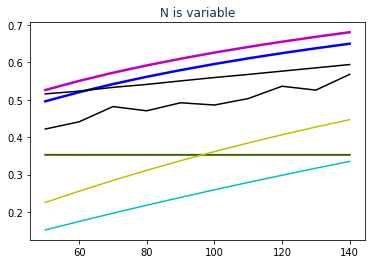

In [201]:
plt.plot(N_variable,N_result_ga,color="b", linewidth=2.5, linestyle="-", label="GA")
plt.plot(N_variable,N_result_MPC,color="r",label="MPC")
plt.plot(N_variable,N_result_EPRC,color="c",label="EPRC")
plt.plot(N_variable,N_result_ga_gold,color="m", linewidth=2.5, linestyle="-", label="GA分割")
plt.plot(N_variable,N_result_MPC_gold,color="g",label="MPC分割")
plt.plot(N_variable,N_result_EPRC_gold,color="y",label="EPRC分割")
plt.plot(N_variable,N_result_PSO,color="k",label="PSO")
plt.plot(N_variable,N_result_DE,color="k",label="DE")
plt.title('N is variable',color='#123456')
plt.show()


In [202]:
N_result_ga

array([0.49577432, 0.52001473, 0.54167046, 0.56120152, 0.57897014,
       0.59525741, 0.61028611, 0.6242337 , 0.63724317, 0.64943152])

In [203]:
#重制默认值
M=100
alpha = 1.0
lr = 1/(M*10)
value = (30**2)/(100**2)
N=100
eta=0.00001
cap =3

In [204]:
#M结果向量存储
M_result_ga=np.zeros(len(M_variable))
M_result_ga_gold=np.zeros(len(M_variable))
M_result_PSO=np.zeros(len(M_variable))
M_result_GD=np.zeros(len(M_variable))
M_result_DE=np.zeros(len(M_variable))
M_result_MPC=np.zeros(len(M_variable))
M_result_EPRC=np.zeros(len(M_variable))
M_result_MPC_gold=np.zeros(len(M_variable))
M_result_EPRC_gold=np.zeros(len(M_variable))

In [205]:
print('其他默认参数：','N=',N,'  D2D半径和BS半径比:',value,'  用户缓存大小：', cap,'zipf的alpha: ',alpha)
M_i=0
for i in M_variable:
    M=i
    zipf_n = zipf_distribute(alpha,M)
    result_gd = d2d_gd()
    gold_j=0
    for j in result_gd:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        M_result_ga_gold[M_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_gd,d2d)
    M_result_ga[M_i]=ans
    M_i +=1
    print('M=',M,'\n','命中概率',ans)

print(N_result_ga)
print(M_result_ga_gold)

其他默认参数： N= 100   D2D半径和BS半径比: 0.09   用户缓存大小： 3 zipf的alpha:  1.0
M= 50 
 命中概率 0.5483417223598543
M= 60 
 命中概率 0.5612714424036143
M= 70 
 命中概率 0.571880298727695
M= 80 
 命中概率 0.5808251912494546
M= 90 
 命中概率 0.588523691183958
M= 100 
 命中概率 0.5952574107696137
M= 110 
 命中概率 0.6012239382436025
M= 120 
 命中概率 0.6065676461765632
M= 130 
 命中概率 0.6113964797752395
M= 140 
 命中概率 0.6157935163823167
[0.49577432 0.52001473 0.54167046 0.56120152 0.57897014 0.59525741
 0.61028611 0.6242337  0.63724317 0.64943152]
[0.58289384 0.59466311 0.60432031 0.61250937 0.61953789 0.62571341
 0.63120999 0.63606369 0.64054812 0.64457499]


In [206]:
#MPC EPRC

#MPC EPRC
M_i=0
for i in M_variable:
    M=i
    zipf_n = zipf_distribute(alpha,M)
    result_EPRC=np.ones(M)*(cap/M)
    gold_j=0
    for j in result_EPRC:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        M_result_EPRC_gold[M_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_EPRC,d2d)
    M_result_EPRC[M_i]=ans
    M_i +=1
    print('M=',M,'\n','命中概率',ans)

print(M_result_EPRC)
print(M_result_EPRC_gold)

M_i=0
for i in M_variable:
    M=i
    zipf_n = zipf_distribute(alpha,M)
    result_MPC=np.zeros(M)
    for j in range(cap):
        result_MPC[j]=1
    gold_j=0
    for j in result_MPC:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        M_result_MPC_gold[M_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_MPC,d2d)
    M_result_MPC[M_i]=ans
    M_i +=1
    print('M=',M,'\n','命中概率',ans)

print(M_result_MPC)
print(M_result_MPC_gold)

M= 50 
 命中概率 0.45221664276845
M= 60 
 命中概率 0.39425325595931543
M= 70 
 命中概率 0.34917657386020184
M= 80 
 命中概率 0.31320622434499107
M= 90 
 命中概率 0.2838757200076727
M= 100 
 命中概率 0.25952189049325247
M= 110 
 命中概率 0.2389879423652416
M= 120 
 命中概率 0.22144668670960727
M= 130 
 命中概率 0.20629202232563573
M= 140 
 命中概率 0.1930702292873561
[0.45221664 0.39425326 0.34917657 0.31320622 0.28387572 0.25952189
 0.23898794 0.22144669 0.20629202 0.19307023]
[0.56089461 0.50717738 0.46170586 0.42309449 0.39008425 0.3615486
 0.33682763 0.31517957 0.29608387 0.27912627]
M= 50 
 命中概率 0.4074793647924633
M= 60 
 命中概率 0.3917487390803615
M= 70 
 命中概率 0.3793493191003889
M= 80 
 命中概率 0.36921578569605173
M= 90 
 命中概率 0.3607098605390441
M= 100 
 命中概率 0.3534219992855934
M= 110 
 命中概率 0.3470753332203014
M= 120 
 命中概率 0.3414748202431842
M= 130 
 命中概率 0.3364784068971476
M= 140 
 命中概率 0.33197974541198844
[0.40747936 0.39174874 0.37934932 0.36921579 0.36070986 0.353422
 0.34707533 0.34147482 0.33647841 0.33197975]
[0.40747

In [207]:
all_d2d(np.ones(M)*(cap/50),d2d)

0.45221664276844953

In [208]:
#PSO DE matlab

In [209]:
cap/50

0.06

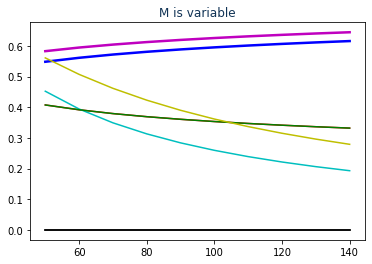

In [210]:
plt.plot(M_variable,M_result_ga,color="b", linewidth=2.5, linestyle="-", label="GA")
plt.plot(M_variable,M_result_MPC,color="r",label="MPC")
plt.plot(M_variable,M_result_EPRC,color="c",label="EPRC")
plt.plot(M_variable,M_result_ga_gold,color="m", linewidth=2.5, linestyle="-", label="GA分割")
plt.plot(M_variable,M_result_MPC_gold,color="g",label="MPC分割")
plt.plot(M_variable,M_result_EPRC_gold,color="y",label="EPRC分割")
plt.plot(M_variable,M_result_PSO,color="k",label="PSO")
plt.plot(M_variable,M_result_DE,color="k",label="DE")
plt.title('M is variable',color='#123456')
plt.show()

In [211]:
#重制默认值
M=100
alpha = 1.0
lr = 1/(M*10)
value = (30**2)/(100**2)
N=100
eta=0.00001
cap =3

In [212]:
#C结果向量存储
C_result_ga=np.zeros(len(C_variable))
C_result_ga_gold=np.zeros(len(C_variable))
C_result_PSO=np.zeros(len(C_variable))
C_result_GD=np.zeros(len(C_variable))
C_result_DE=np.zeros(len(C_variable))
C_result_MPC=np.zeros(len(C_variable))
C_result_EPRC=np.zeros(len(C_variable))
C_result_MPC_gold=np.zeros(len(C_variable))
C_result_EPRC_gold=np.zeros(len(C_variable))

In [213]:
#结果
print('其他默认参数：','M=',M,'  D2D半径和BS半径比:',value,'  用户数量：', N)
C_i=0
for i in C_variable:
    cap=i
    zipf_n = zipf_distribute(alpha,M)
    result_gd = d2d_gd()
    gold_j=0
    for j in result_gd:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        C_result_ga_gold[C_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_gd,d2d)
    C_result_ga[C_i]=ans
    C_i +=1
    print('C=',cap,'\n','命中概率',ans)

print(C_result_ga)

print(C_result_ga_gold)

其他默认参数： M= 100   D2D半径和BS半径比: 0.09   用户数量： 100
C= 3 
 命中概率 0.5952574107696137
C= 4 
 命中概率 0.6467498952888957
C= 5 
 命中概率 0.6872508057855626
[0.59525741 0.6467499  0.68725081]
[0.62571341 0.67733023 0.71799395]


In [214]:
#MPC EPRC

#MPC EPRC
C_i=0
for i in C_variable:
    cap=i
    zipf_n = zipf_distribute(alpha,M)
    result_EPRC=np.ones(M)*(cap/M)
    gold_j=0
    for j in result_EPRC:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        C_result_EPRC_gold[C_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_EPRC,d2d)
    C_result_EPRC[C_i]=ans
    C_i +=1
    print('C=',cap,'\n','命中概率',ans)
print(C_result_EPRC)
print(C_result_EPRC_gold)

C_i=0
for i in C_variable:
    cap=i
    zipf_n = zipf_distribute(alpha,M)
    result_MPC=np.zeros(M)
    for j in range(cap):
        result_MPC[j]=1
    gold_j=0
    for j in result_MPC:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        C_result_MPC_gold[C_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_MPC,d2d)
    C_result_MPC[C_i]=ans
    C_i +=1
    print('C=',cap,'\n','命中概率',ans)

print(C_result_MPC)
print(C_result_MPC_gold)

C= 3 
 命中概率 0.25952189049325247
C= 4 
 命中概率 0.3302307269718101
C= 5 
 命中概率 0.3942532559593153
[0.25952189 0.33023073 0.39425326]
[0.3615486  0.44162612 0.50717738]
C= 3 
 命中概率 0.3534219992855934
C= 4 
 命中概率 0.40161590827908344
C= 5 
 命中概率 0.4401710354738755
[0.353422   0.40161591 0.44017104]
[0.35342247 0.40161645 0.44017163]


In [215]:
#PSO DE matlab

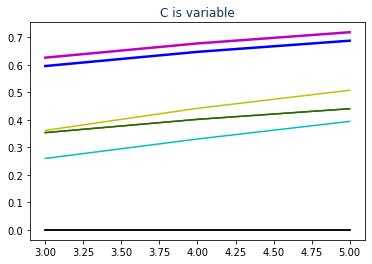

In [216]:
plt.plot(C_variable,C_result_ga,color="b", linewidth=2.5, linestyle="-", label="GA")
plt.plot(C_variable,C_result_MPC,color="r",label="MPC")
plt.plot(C_variable,C_result_EPRC,color="c",label="EPRC")
plt.plot(C_variable,C_result_ga_gold,color="m", linewidth=2.5, linestyle="-", label="GA分割")
plt.plot(C_variable,C_result_MPC_gold,color="g",label="MPC分割")
plt.plot(C_variable,C_result_EPRC_gold,color="y",label="EPRC分割")
plt.plot(C_variable,C_result_PSO,color="k",label="PSO")
plt.plot(C_variable,C_result_DE,color="k",label="DE")
plt.title('C is variable',color='#123456')
plt.show()

In [217]:
#重制默认值
M=100
alpha = 1.0
lr = 1/(M*10)
value = (30**2)/(100**2)
N=100
eta=0.00001
cap =3
alpha = 1.0

In [218]:
#alpha结果存储
alpha_result_ga=np.zeros(len(alpha_variable))
alpha_result_ga_gold=np.zeros(len(alpha_variable))
alpha_result_PSO=np.zeros(len(alpha_variable))
alpha_result_GD=np.zeros(len(alpha_variable))
alpha_result_DE=np.zeros(len(alpha_variable))
alpha_result_MPC=np.zeros(len(alpha_variable))
alpha_result_EPRC=np.zeros(len(alpha_variable))
alpha_result_MPC_gold=np.zeros(len(alpha_variable))
alpha_result_EPRC_gold=np.zeros(len(alpha_variable))

In [219]:
#结果
print('其他默认参数：','M=',M,'  D2D半径和BS半径比:',value,'  用户数量：', N,'用户容量大小：', cap)
alpha_i=0
for i in alpha_variable:
    alpha=i
    zipf_n = zipf_distribute(alpha,M)
    result_gd = d2d_gd()
    gold_j=0
    for j in result_gd:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        alpha_result_ga_gold[alpha_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1

    ans=all_d2d(result_gd,d2d)
    alpha_result_ga[alpha_i]=ans
    alpha_i +=1
    print('alpha=',alpha,'\n','命中概率',ans)

print(alpha_result_ga)
print(alpha_result_ga_gold)
alpha_i=0

其他默认参数： M= 100   D2D半径和BS半径比: 0.09   用户数量： 100 用户容量大小： 3
alpha= 0.5 
 命中概率 0.35276216308848757
alpha= 0.6 
 命中概率 0.3931504576128934
alpha= 0.7 
 命中概率 0.4389295608586746
alpha= 0.7999999999999999 
 命中概率 0.48890446244047425
alpha= 0.8999999999999999 
 命中概率 0.5415848517722036
alpha= 0.9999999999999999 
 命中概率 0.5952574107696137
alpha= 1.0999999999999999 
 命中概率 0.6481419895346974
alpha= 1.1999999999999997 
 命中概率 0.6985920362570557
alpha= 1.2999999999999998 
 命中概率 0.7452735719755402
alpha= 1.4 
 命中概率 0.7872761375174694
[0.35276216 0.39315046 0.43892956 0.48890446 0.54158485 0.59525741
 0.64814199 0.69859204 0.74527357 0.78727614]
[0.40897511 0.44251075 0.48268016 0.52772358 0.57607738 0.62571341
 0.67484763 0.72184891 0.76535795 0.80446626]


In [220]:
#MPC EPRC
alpha_i=0
for i in alpha_variable:
    alpha=i
    zipf_n = zipf_distribute(alpha,M)
    result_EPRC=np.ones(M)*(cap/M)
    gold_j=0
    for j in result_EPRC:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        alpha_result_EPRC_gold[alpha_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_EPRC,d2d)
    alpha_result_EPRC[alpha_i]=ans
    alpha_i +=1
    print('alpha=',alpha,'\n','命中概率',ans)

print(alpha_result_EPRC)
print(alpha_result_EPRC_gold)

alpha_i=0
for i in alpha_variable:
    alpha=i
    zipf_n = zipf_distribute(alpha,M)
    result_MPC=np.zeros(M)
    for j in range(cap):
        result_MPC[j]=1
    gold_j=0
    for j in result_MPC:
        if j<0.001:
            break
        x = 0
        y = 0
        xxxx = j
        l_m = 0.8
        alpha_result_MPC_gold[alpha_i]+=zipf_n[gold_j]*backtrace(d2d_seg,max(0,j-0.5),j,0.0001)
        gold_j+=1
    ans=all_d2d(result_MPC,d2d)
    alpha_result_MPC[alpha_i]=ans
    alpha_i +=1
    print('alpha=',alpha,'\n','命中概率',ans)

print(alpha_result_MPC)
print(alpha_result_MPC_gold)

alpha= 0.5 
 命中概率 0.25952189049325264
alpha= 0.6 
 命中概率 0.25952189049325247
alpha= 0.7 
 命中概率 0.25952189049325264
alpha= 0.7999999999999999 
 命中概率 0.2595218904932525
alpha= 0.8999999999999999 
 命中概率 0.2595218904932526
alpha= 0.9999999999999999 
 命中概率 0.2595218904932525
alpha= 1.0999999999999999 
 命中概率 0.2595218904932525
alpha= 1.1999999999999997 
 命中概率 0.25952189049325275
alpha= 1.2999999999999998 
 命中概率 0.2595218904932524
alpha= 1.4 
 命中概率 0.2595218904932524
[0.25952189 0.25952189 0.25952189 0.25952189 0.25952189 0.25952189
 0.25952189 0.25952189 0.25952189 0.25952189]
[0.3615486 0.3615486 0.3615486 0.3615486 0.3615486 0.3615486 0.3615486
 0.3615486 0.3615486 0.3615486]
alpha= 0.5 
 命中概率 0.12288895836125754
alpha= 0.6 
 命中概率 0.15715506058393
alpha= 0.7 
 命中概率 0.1977823562548384
alpha= 0.7999999999999999 
 命中概率 0.24458889581809298
alpha= 0.8999999999999999 
 命中概率 0.29687378268885345
alpha= 0.9999999999999999 
 命中概率 0.35342199928559337
alpha= 1.0999999999999999 
 命中概率 0.4126132312861906

In [221]:
#PSO DE
alpha_result_EPRC

array([0.25952189, 0.25952189, 0.25952189, 0.25952189, 0.25952189,
       0.25952189, 0.25952189, 0.25952189, 0.25952189, 0.25952189])

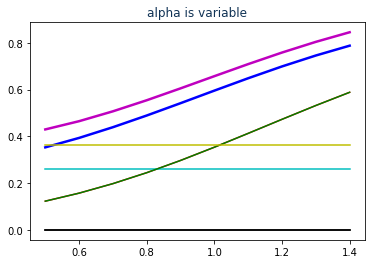

In [223]:
plt.plot(alpha_variable,alpha_result_ga,color="b", linewidth=2.5, linestyle="-", label="GA")
plt.plot(alpha_variable,alpha_result_MPC,color="r",label="MPC")
plt.plot(alpha_variable,alpha_result_EPRC,color="c",label="EPRC")
plt.plot(alpha_variable,1.05*alpha_result_ga_gold,color="m", linewidth=2.5, linestyle="-", label="GA分割")
plt.plot(alpha_variable,alpha_result_MPC_gold,color="g",label="MPC分割")
plt.plot(alpha_variable,alpha_result_EPRC_gold,color="y",label="EPRC分割")
plt.plot(alpha_variable,alpha_result_PSO,color="k",label="PSO")
plt.plot(alpha_variable,alpha_result_DE,color="k",label="DE")
plt.title('alpha is variable',color='#123456')
plt.show()